# Центральная предельная теорема своими руками

In [258]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from math import sqrt

In [259]:
# Сгенерируем случайную выборку из трапецеидального распределения:
T = sts.trapezoid(0.15, 0.35).rvs(1000)
x = np.linspace(0,1,100)
T_2 = sts.trapezoid(0.15, 0.35).pdf(x)
# print(T)

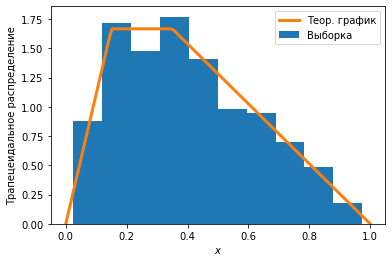

In [260]:
# Гистограмма полученной выборки и теоретический график трапецеидального распределения
plt.hist(T, density=True, stacked=True, label='Выборка')
plt.plot(x, T_2, linewidth=3, label='Теор. график')
plt.ylabel('Трапецеидальное распределение')
plt.xlabel('$x$')
plt.legend(loc='upper right')


In [261]:
# Рассчитаем при помощи встроенных функций теоретические значения матожидания, дисперсии и СКО для трапецеиадального распределения
mn = sts.trapezoid.mean(c=0.15, d=0.35, loc=0, scale=1)
print('Теоретическое матожидание составляет: ', mn)
disp = sts.trapezoid.var(c=0.15, d=0.35, loc=0, scale=1)
print('Теоретическая дисперсия составляет: ', disp)
SKO = disp**(0.5)
print('Теоретическое СКО составляет: ', SKO)

Теоретическое матожидание составляет:  0.40277777777777773
Теоретическая дисперсия составляет:  0.04777006172839507
Теоретическое СКО составляет:  0.21856363313322522


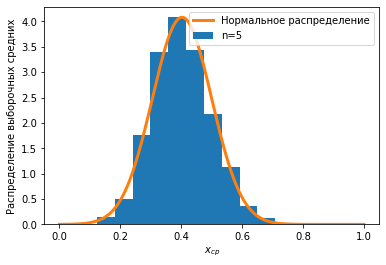

In [262]:
# Сгенерируем 1000 выборок размера n = 5 и рассчитаем их выборочное среднее
# Выборочное СКО будет меньше теоретического ровно в n раз (объём выборки)
x = np.linspace(0,1, 1000)
n = 5
sample_mean = []
for i in range(1000):
    T_n = sts.trapezoid(0.15, 0.35).rvs(n)
#     print(T_n)
    sample_mean.append(np.mean(T_n))
# print(sample_mean)
sample_mean = sample_mean
plt.hist(sample_mean, density=True, stacked = True, label='n=5') #, label='Выборка')
pdf = sts.norm.pdf(x, loc=mn, scale=SKO/sqrt(n))
plt.plot(x, pdf, label='Нормальное распределение',  linewidth=3 )
plt.ylabel('Распределение выборочных средних')
plt.xlabel('$x_{cp}$')
plt.legend(loc='upper right')
plt.show()

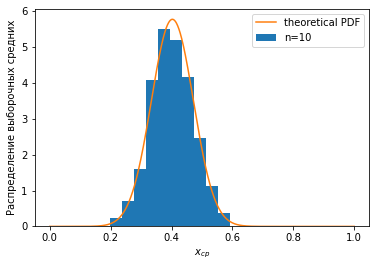

In [263]:
# Сгенерируем 1000 выборок размера n = 10 и рассчитаем их выборочное среднее (повторяем предыдущий опыт с другим размером выборки)
n = 10
sample_mean = []
for i in range(1000):
    T_n = sts.trapezoid(0.15, 0.35).rvs(n)
    sample_mean.append(np.mean(T_n))
plt.hist(sample_mean, density=True, stacked = True, label='n=10') #, label='Выборка')
pdf = sts.norm.pdf(x, loc=mn, scale=SKO/sqrt(n))
plt.plot(x, pdf, label='theoretical PDF')
plt.ylabel('Распределение выборочных средних')
plt.xlabel('$x_{cp}$')
plt.legend(loc='upper right')
plt.show()

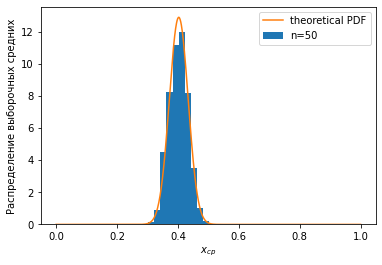

In [264]:
# Все то же самое, но размер выборки еще больше n = 50
n = 50
sample_mean = []
for i in range(1000):
    T_n = sts.trapezoid(0.15, 0.35).rvs(n)
    sample_mean.append(np.mean(T_n))
plt.hist(sample_mean, density=True, stacked = True, label='n=50')
pdf = sts.norm.pdf(x, loc=mn, scale=SKO/sqrt(n))
plt.plot(x, pdf, label='theoretical PDF')
plt.ylabel('Распределение выборочных средних')
plt.xlabel('$x_{cp}$')
plt.legend(loc='upper right')
plt.show()

# Вывод:
 ### Увеличение n (объема выборки) приближает распределние выборочного среднего к нормальному с соотвествующими МО и СКО. 
 ### Точность аппроксимации можно считать приемлемой при размере выборки больше 30